In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats
import os

# Feature Engineering

In [2]:
price_data = pd.read_csv("price_features_v2.csv")
temp_price_data = pd.read_csv("temp_price_features_v2.csv")

In [3]:
temp_price_data.head(10)

,Date,Hour,Zone,LMP,Energy_LMP,Loss_LMP,Congestion_LMP,TMP,Time,GD Henry Hub,...,DirectMWh,IndirectMWh,TotalMWh,Type,LATITUDE,LONGITUDE,HDD,CDD,Season,Population
0,2016-02-05,22,CHIHUAHUA,630.63,740.30,-67.07,-42.60,55.76,21:00:00,2.045,...,NaN,NaN,435.140,Energy,28.633333,-106.083333,9.24,0.00,WINTER,1036806
1,2016-02-05,22,MONTERREY,546.64,740.30,-58.11,-135.55,59.00,21:00:00,2.045,...,NaN,NaN,1609.930,Energy,25.733333,-100.300000,6.00,0.00,WINTER,5341171
2,2016-02-05,22,VDM SUR,755.29,740.30,20.02,-5.03,73.94,21:00:00,2.045,...,NaN,NaN,2220.049,Energy,19.400000,-99.183333,0.00,8.94,WINTER,21804515
3,2016-02-06,1,CHIHUAHUA,590.27,676.79,-86.52,0.00,56.66,00:00:00,2.085,...,NaN,NaN,383.100,Energy,28.633333,-106.083333,8.34,0.00,WINTER,1036806
4,2016-02-06,1,MONTERREY,633.59,676.79,-43.19,0.00,60.08,00:00:00,2.085,...,NaN,NaN,2074.210,Energy,25.733333,-100.300000,4.92,0.00,WINTER,5341171
5,2016-02-06,1,VDM SUR,691.27,676.79,14.48,0.00,72.68,00:00:00,2.085,...,NaN,NaN,1673.023,Energy,19.400000,-99.183333,0.00,7.68,WINTER,21804515
6,2016-02-06,4,CHIHUAHUA,471.82,539.77,-67.94,0.00,47.12,03:00:00,2.085,...,NaN,NaN,349.240,Energy,28.633333,-106.083333,17.88,0.00,WINTER,1036806
7,2016-02-06,4,MONTERREY,499.26,539.77,-40.51,0.00,57.56,03:00:00,2.085,...,NaN,NaN,1879.120,Energy,25.733333,-100.300000,7.44,0.00,WINTER,5341171
8,2016-02-06,4,VDM SUR,553.39,539.77,13.63,0.00,65.12,03:00:00,2.085,...,NaN,NaN,1443.834,Energy,19.400000,-99.183333,0.00,0.12,WINTER,21804515
9,2016-02-06,7,CHIHUAHUA,517.67,597.50,-79.83,0.00,35.24,06:00:00,2.085,...,NaN,NaN,360.970,Energy,28.633333,-106.083333,29.76,0.00,WINTER,1036806


In [4]:
price_data.head(10)

,Date,Hour,Zone,LMP,Energy_LMP,Loss_LMP,Congestion_LMP,TMP,DATETIME,Time,...,DirectMWh,IndirectMWh,TotalMWh,Type,LATITUDE,LONGITUDE,HDD,CDD,Season,Population
0,2016-02-05 00:00:00,20,MONTERREY,575.21,748.03,-62.02,-110.80,NaN,NaN,NaN,...,NaN,NaN,1667.390,Energy,25.733333,-100.300000,0.00,0.00,WINTER,5341171
1,2016-02-05 00:00:00,20,VDM SUR,765.12,748.03,21.20,-4.11,NaN,NaN,NaN,...,NaN,NaN,2299.714,Energy,19.400000,-99.183333,0.00,0.00,WINTER,21804515
2,2016-02-05 00:00:00,21,CHIHUAHUA,632.40,745.34,-74.92,-38.02,NaN,NaN,NaN,...,NaN,NaN,437.740,Energy,28.633333,-106.083333,0.00,0.00,WINTER,1036806
3,2016-02-05 00:00:00,21,GUADALAJARA,789.74,745.34,31.91,12.48,NaN,NaN,NaN,...,NaN,NaN,1184.613,Energy,20.666667,-103.383333,0.00,0.00,WINTER,1385629
4,2016-02-05 00:00:00,21,MONTERREY,566.03,745.34,-58.33,-120.99,NaN,NaN,NaN,...,NaN,NaN,1665.630,Energy,25.733333,-100.300000,0.00,0.00,WINTER,5341171
5,2016-02-05 00:00:00,21,VDM SUR,759.00,745.34,18.14,-4.49,NaN,NaN,NaN,...,NaN,NaN,2297.354,Energy,19.400000,-99.183333,0.00,0.00,WINTER,21804515
6,2016-02-05 00:00:00,22,CHIHUAHUA,630.63,740.30,-67.07,-42.60,55.76,2016-02-05 21:00:00,21:00:00,...,NaN,NaN,435.140,Energy,28.633333,-106.083333,9.24,0.00,WINTER,1036806
7,2016-02-05 00:00:00,22,GUADALAJARA,785.35,740.30,31.07,13.99,NaN,NaN,NaN,...,NaN,NaN,1136.742,Energy,20.666667,-103.383333,0.00,0.00,WINTER,1385629
8,2016-02-05 00:00:00,22,MONTERREY,546.64,740.30,-58.11,-135.55,59.00,2016-02-05 21:00:00,21:00:00,...,NaN,NaN,1609.930,Energy,25.733333,-100.300000,6.00,0.00,WINTER,5341171
9,2016-02-05 00:00:00,22,VDM SUR,755.29,740.30,20.02,-5.03,73.94,2016-02-05 21:00:00,21:00:00,...,NaN,NaN,2220.049,Energy,19.400000,-99.183333,0.00,8.94,WINTER,21804515


In [5]:
price_data = price_data.drop(['DirectMWh', 'IndirectMWh'], axis = 1)
temp_price_data = temp_price_data.drop(['DirectMWh', 'IndirectMWh'], axis = 1)

In [6]:
price_data['Date']= pd.to_datetime(price_data['Date'])
price_data['DATETIME']= pd.to_datetime(price_data['DATETIME'])
price_data.info()
price_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179227 entries, 0 to 179226
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                179227 non-null  datetime64[ns]
 1   Hour                179227 non-null  int64         
 2   Zone                179227 non-null  object        
 3   LMP                 179227 non-null  float64       
 4   Energy_LMP          179227 non-null  float64       
 5   Loss_LMP            179227 non-null  float64       
 6   Congestion_LMP      179227 non-null  float64       
 7   TMP                 44154 non-null   float64       
 8   DATETIME            44154 non-null   datetime64[ns]
 9   Time                44154 non-null   object        
 10  GD Henry Hub        179227 non-null  float64       
 11  GD Houston ShipChl  178267 non-null  float64       
 12  GD Waha             179227 non-null  float64       
 13  TotalMWh            177974 no

,Date,Hour,Zone,LMP,Energy_LMP,Loss_LMP,Congestion_LMP,TMP,DATETIME,Time,...,GD Houston ShipChl,GD Waha,TotalMWh,Type,LATITUDE,LONGITUDE,HDD,CDD,Season,Population
0,2016-02-05,20,MONTERREY,575.21,748.03,-62.02,-110.80,NaN,NaT,NaN,...,1.99,1.94,1667.390,Energy,25.733333,-100.300000,0.0,0.0,WINTER,5341171
1,2016-02-05,20,VDM SUR,765.12,748.03,21.20,-4.11,NaN,NaT,NaN,...,1.99,1.94,2299.714,Energy,19.400000,-99.183333,0.0,0.0,WINTER,21804515
2,2016-02-05,21,CHIHUAHUA,632.40,745.34,-74.92,-38.02,NaN,NaT,NaN,...,1.99,1.94,437.740,Energy,28.633333,-106.083333,0.0,0.0,WINTER,1036806
3,2016-02-05,21,GUADALAJARA,789.74,745.34,31.91,12.48,NaN,NaT,NaN,...,1.99,1.94,1184.613,Energy,20.666667,-103.383333,0.0,0.0,WINTER,1385629
4,2016-02-05,21,MONTERREY,566.03,745.34,-58.33,-120.99,NaN,NaT,NaN,...,1.99,1.94,1665.630,Energy,25.733333,-100.300000,0.0,0.0,WINTER,5341171


In [7]:
price_data['Season'].value_counts()

WINTER    62111
SUMMER    58560
FALL      29296
SPRING    29260
Name: Season, dtype: int64

In [8]:
temp_price_data['Date']= pd.to_datetime(temp_price_data['Date'])
temp_price_data.info()
temp_price_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44154 entries, 0 to 44153
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                44154 non-null  datetime64[ns]
 1   Hour                44154 non-null  int64         
 2   Zone                44154 non-null  object        
 3   LMP                 44154 non-null  float64       
 4   Energy_LMP          44154 non-null  float64       
 5   Loss_LMP            44154 non-null  float64       
 6   Congestion_LMP      44154 non-null  float64       
 7   TMP                 44154 non-null  float64       
 8   Time                44154 non-null  object        
 9   GD Henry Hub        44154 non-null  float64       
 10  GD Houston ShipChl  43874 non-null  float64       
 11  GD Waha             44154 non-null  float64       
 12  TotalMWh            43983 non-null  float64       
 13  Type                43983 non-null  object    

,Date,Hour,Zone,LMP,Energy_LMP,Loss_LMP,Congestion_LMP,TMP,Time,GD Henry Hub,GD Houston ShipChl,GD Waha,TotalMWh,Type,LATITUDE,LONGITUDE,HDD,CDD,Season,Population
0,2016-02-05,22,CHIHUAHUA,630.63,740.30,-67.07,-42.60,55.76,21:00:00,2.045,1.99,1.94,435.140,Energy,28.633333,-106.083333,9.24,0.00,WINTER,1036806
1,2016-02-05,22,MONTERREY,546.64,740.30,-58.11,-135.55,59.00,21:00:00,2.045,1.99,1.94,1609.930,Energy,25.733333,-100.300000,6.00,0.00,WINTER,5341171
2,2016-02-05,22,VDM SUR,755.29,740.30,20.02,-5.03,73.94,21:00:00,2.045,1.99,1.94,2220.049,Energy,19.400000,-99.183333,0.00,8.94,WINTER,21804515
3,2016-02-06,1,CHIHUAHUA,590.27,676.79,-86.52,0.00,56.66,00:00:00,2.085,2.02,1.94,383.100,Energy,28.633333,-106.083333,8.34,0.00,WINTER,1036806
4,2016-02-06,1,MONTERREY,633.59,676.79,-43.19,0.00,60.08,00:00:00,2.085,2.02,1.94,2074.210,Energy,25.733333,-100.300000,4.92,0.00,WINTER,5341171


In [9]:
temp_price_data['Hour'].value_counts()

16    6315
19    6187
1     6162
13    5988
22    5954
4     5703
7     4084
10    3591
15      35
21      31
24      28
18      23
12      21
3       19
6        7
9        3
20       3
Name: Hour, dtype: int64

In [10]:
price_data['Hour'].value_counts()

1     7468
2     7468
23    7468
22    7468
21    7468
19    7468
18    7468
17    7468
16    7468
15    7468
14    7468
13    7468
12    7468
11    7468
10    7468
9     7468
8     7468
7     7468
6     7468
5     7468
4     7468
20    7467
3     7460
24    7456
25      16
Name: Hour, dtype: int64

Temperature data only has hours in 3 hour increments typically. I am going to start with the temp data set and move out if needed

### Turn my categorical variables using one hot encoding 

In [11]:
temp_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44154 entries, 0 to 44153
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                44154 non-null  datetime64[ns]
 1   Hour                44154 non-null  int64         
 2   Zone                44154 non-null  object        
 3   LMP                 44154 non-null  float64       
 4   Energy_LMP          44154 non-null  float64       
 5   Loss_LMP            44154 non-null  float64       
 6   Congestion_LMP      44154 non-null  float64       
 7   TMP                 44154 non-null  float64       
 8   Time                44154 non-null  object        
 9   GD Henry Hub        44154 non-null  float64       
 10  GD Houston ShipChl  43874 non-null  float64       
 11  GD Waha             44154 non-null  float64       
 12  TotalMWh            43983 non-null  float64       
 13  Type                43983 non-null  object    

In [12]:
temp_price_data['Type'].value_counts()

Energy    43983
Name: Type, dtype: int64

In [13]:
temp_price_data = temp_price_data.drop(['Type'], axis = 1)


In [14]:
price_data = price_data.drop(['Type'], axis = 1)

In [15]:
temp_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44154 entries, 0 to 44153
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                44154 non-null  datetime64[ns]
 1   Hour                44154 non-null  int64         
 2   Zone                44154 non-null  object        
 3   LMP                 44154 non-null  float64       
 4   Energy_LMP          44154 non-null  float64       
 5   Loss_LMP            44154 non-null  float64       
 6   Congestion_LMP      44154 non-null  float64       
 7   TMP                 44154 non-null  float64       
 8   Time                44154 non-null  object        
 9   GD Henry Hub        44154 non-null  float64       
 10  GD Houston ShipChl  43874 non-null  float64       
 11  GD Waha             44154 non-null  float64       
 12  TotalMWh            43983 non-null  float64       
 13  LATITUDE            44154 non-null  float64   

In [16]:
temp_price_data = temp_price_data.drop(['Time'], axis = 1)
price_data = price_data.drop(['Time'], axis = 1)

In [17]:
temp_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44154 entries, 0 to 44153
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                44154 non-null  datetime64[ns]
 1   Hour                44154 non-null  int64         
 2   Zone                44154 non-null  object        
 3   LMP                 44154 non-null  float64       
 4   Energy_LMP          44154 non-null  float64       
 5   Loss_LMP            44154 non-null  float64       
 6   Congestion_LMP      44154 non-null  float64       
 7   TMP                 44154 non-null  float64       
 8   GD Henry Hub        44154 non-null  float64       
 9   GD Houston ShipChl  43874 non-null  float64       
 10  GD Waha             44154 non-null  float64       
 11  TotalMWh            43983 non-null  float64       
 12  LATITUDE            44154 non-null  float64       
 13  LONGITUDE           44154 non-null  float64   

In [18]:
temp_price_data = pd.get_dummies(temp_price_data,columns = ['Zone'],drop_first=True, prefix='Z')

In [19]:
temp_price_data.head()

,Date,Hour,LMP,Energy_LMP,Loss_LMP,Congestion_LMP,TMP,GD Henry Hub,GD Houston ShipChl,GD Waha,TotalMWh,LATITUDE,LONGITUDE,HDD,CDD,Season,Population,Z_GUADALAJARA,Z_MONTERREY,Z_VDM SUR
0,2016-02-05,22,630.63,740.30,-67.07,-42.60,55.76,2.045,1.99,1.94,435.140,28.633333,-106.083333,9.24,0.00,WINTER,1036806,0,0,0
1,2016-02-05,22,546.64,740.30,-58.11,-135.55,59.00,2.045,1.99,1.94,1609.930,25.733333,-100.300000,6.00,0.00,WINTER,5341171,0,1,0
2,2016-02-05,22,755.29,740.30,20.02,-5.03,73.94,2.045,1.99,1.94,2220.049,19.400000,-99.183333,0.00,8.94,WINTER,21804515,0,0,1
3,2016-02-06,1,590.27,676.79,-86.52,0.00,56.66,2.085,2.02,1.94,383.100,28.633333,-106.083333,8.34,0.00,WINTER,1036806,0,0,0
4,2016-02-06,1,633.59,676.79,-43.19,0.00,60.08,2.085,2.02,1.94,2074.210,25.733333,-100.300000,4.92,0.00,WINTER,5341171,0,1,0


In [20]:
temp_price_data = pd.get_dummies(temp_price_data,columns = ['Season'],drop_first=True, prefix='S')

In [21]:
temp_price_data.head()

,Date,Hour,LMP,Energy_LMP,Loss_LMP,Congestion_LMP,TMP,GD Henry Hub,GD Houston ShipChl,GD Waha,...,LONGITUDE,HDD,CDD,Population,Z_GUADALAJARA,Z_MONTERREY,Z_VDM SUR,S_SPRING,S_SUMMER,S_WINTER
0,2016-02-05,22,630.63,740.30,-67.07,-42.60,55.76,2.045,1.99,1.94,...,-106.083333,9.24,0.00,1036806,0,0,0,0,0,1
1,2016-02-05,22,546.64,740.30,-58.11,-135.55,59.00,2.045,1.99,1.94,...,-100.300000,6.00,0.00,5341171,0,1,0,0,0,1
2,2016-02-05,22,755.29,740.30,20.02,-5.03,73.94,2.045,1.99,1.94,...,-99.183333,0.00,8.94,21804515,0,0,1,0,0,1
3,2016-02-06,1,590.27,676.79,-86.52,0.00,56.66,2.085,2.02,1.94,...,-106.083333,8.34,0.00,1036806,0,0,0,0,0,1
4,2016-02-06,1,633.59,676.79,-43.19,0.00,60.08,2.085,2.02,1.94,...,-100.300000,4.92,0.00,5341171,0,1,0,0,0,1


### Handle Remaining Null values 

In [22]:
temp_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44154 entries, 0 to 44153
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                44154 non-null  datetime64[ns]
 1   Hour                44154 non-null  int64         
 2   LMP                 44154 non-null  float64       
 3   Energy_LMP          44154 non-null  float64       
 4   Loss_LMP            44154 non-null  float64       
 5   Congestion_LMP      44154 non-null  float64       
 6   TMP                 44154 non-null  float64       
 7   GD Henry Hub        44154 non-null  float64       
 8   GD Houston ShipChl  43874 non-null  float64       
 9   GD Waha             44154 non-null  float64       
 10  TotalMWh            43983 non-null  float64       
 11  LATITUDE            44154 non-null  float64       
 12  LONGITUDE           44154 non-null  float64       
 13  HDD                 44154 non-null  float64   

In [23]:
temp_price_data = temp_price_data.dropna()

In [24]:
temp_price_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43703 entries, 0 to 44153
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                43703 non-null  datetime64[ns]
 1   Hour                43703 non-null  int64         
 2   LMP                 43703 non-null  float64       
 3   Energy_LMP          43703 non-null  float64       
 4   Loss_LMP            43703 non-null  float64       
 5   Congestion_LMP      43703 non-null  float64       
 6   TMP                 43703 non-null  float64       
 7   GD Henry Hub        43703 non-null  float64       
 8   GD Houston ShipChl  43703 non-null  float64       
 9   GD Waha             43703 non-null  float64       
 10  TotalMWh            43703 non-null  float64       
 11  LATITUDE            43703 non-null  float64       
 12  LONGITUDE           43703 non-null  float64       
 13  HDD                 43703 non-null  float64   

### Extract Year, Month, Day from Date 

In [25]:
temp_price_data['Year'] = pd.DatetimeIndex(temp_price_data['Date']).year
temp_price_data['Month'] = pd.DatetimeIndex(temp_price_data['Date']).month
temp_price_data['Day'] = pd.DatetimeIndex(temp_price_data['Date']).day
##day of week

In [26]:
temp_price_data.head()

,Date,Hour,LMP,Energy_LMP,Loss_LMP,Congestion_LMP,TMP,GD Henry Hub,GD Houston ShipChl,GD Waha,...,Population,Z_GUADALAJARA,Z_MONTERREY,Z_VDM SUR,S_SPRING,S_SUMMER,S_WINTER,Year,Month,Day
0,2016-02-05,22,630.63,740.30,-67.07,-42.60,55.76,2.045,1.99,1.94,...,1036806,0,0,0,0,0,1,2016,2,5
1,2016-02-05,22,546.64,740.30,-58.11,-135.55,59.00,2.045,1.99,1.94,...,5341171,0,1,0,0,0,1,2016,2,5
2,2016-02-05,22,755.29,740.30,20.02,-5.03,73.94,2.045,1.99,1.94,...,21804515,0,0,1,0,0,1,2016,2,5
3,2016-02-06,1,590.27,676.79,-86.52,0.00,56.66,2.085,2.02,1.94,...,1036806,0,0,0,0,0,1,2016,2,6
4,2016-02-06,1,633.59,676.79,-43.19,0.00,60.08,2.085,2.02,1.94,...,5341171,0,1,0,0,0,1,2016,2,6


In [27]:
temp_price_nodate = temp_price_data.drop(['Date'], axis = 1)

In [28]:
temp_price_nodate.head()

,Hour,LMP,Energy_LMP,Loss_LMP,Congestion_LMP,TMP,GD Henry Hub,GD Houston ShipChl,GD Waha,TotalMWh,...,Population,Z_GUADALAJARA,Z_MONTERREY,Z_VDM SUR,S_SPRING,S_SUMMER,S_WINTER,Year,Month,Day
0,22,630.63,740.30,-67.07,-42.60,55.76,2.045,1.99,1.94,435.140,...,1036806,0,0,0,0,0,1,2016,2,5
1,22,546.64,740.30,-58.11,-135.55,59.00,2.045,1.99,1.94,1609.930,...,5341171,0,1,0,0,0,1,2016,2,5
2,22,755.29,740.30,20.02,-5.03,73.94,2.045,1.99,1.94,2220.049,...,21804515,0,0,1,0,0,1,2016,2,5
3,1,590.27,676.79,-86.52,0.00,56.66,2.085,2.02,1.94,383.100,...,1036806,0,0,0,0,0,1,2016,2,6
4,1,633.59,676.79,-43.19,0.00,60.08,2.085,2.02,1.94,2074.210,...,5341171,0,1,0,0,0,1,2016,2,6


In [29]:
temp_price_nodate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43703 entries, 0 to 44153
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Hour                43703 non-null  int64  
 1   LMP                 43703 non-null  float64
 2   Energy_LMP          43703 non-null  float64
 3   Loss_LMP            43703 non-null  float64
 4   Congestion_LMP      43703 non-null  float64
 5   TMP                 43703 non-null  float64
 6   GD Henry Hub        43703 non-null  float64
 7   GD Houston ShipChl  43703 non-null  float64
 8   GD Waha             43703 non-null  float64
 9   TotalMWh            43703 non-null  float64
 10  LATITUDE            43703 non-null  float64
 11  LONGITUDE           43703 non-null  float64
 12  HDD                 43703 non-null  float64
 13  CDD                 43703 non-null  float64
 14  Population          43703 non-null  int64  
 15  Z_GUADALAJARA       43703 non-null  uint8  
 16  Z_MO

In [30]:
temp_price_nodate = temp_price_nodate.drop(['Energy_LMP', 'Loss_LMP', 'Congestion_LMP'], axis = 1)


### Random Forest Feature Importance 

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(temp_price_nodate.drop(columns='LMP'), 
                                                    temp_price_nodate.LMP, test_size=0.3, 
                                                    random_state=42)

In [108]:
## Import the random forest model.
from sklearn.ensemble import RandomForestRegressor 

rf = RandomForestRegressor() 
rf.fit(X_train, y_train) 
rf.score(X_test, y_test)

0.8327987389561613

In [109]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [110]:
feature_importances

,importance
GD Henry Hub,0.212981
TotalMWh,0.185881
GD Waha,0.106222
GD Houston ShipChl,0.098918
Day,0.090879
Month,0.066145
Hour,0.060070
Year,0.040585
TMP,0.028412
CDD,0.025283


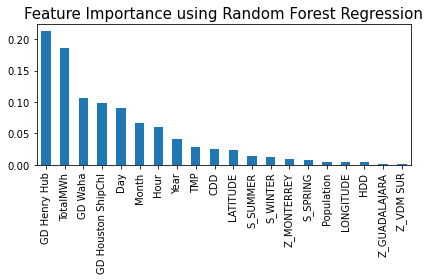

In [111]:
feature_importances.plot(kind='bar',rot=10,legend=False)
plt.title('Feature Importance using Random Forest Regression',fontsize=15)
plt.xticks(rotation = 90) 
plt.tight_layout()
plt.savefig('featureimportance.png')
plt.show()

### Normalize Features 

In [112]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_te_scaled = scaler.transform(X_test)



In [113]:
## Import the random forest model.
rf2 = RandomForestRegressor() 
rf2.fit(X_tr_scaled, y_train) 
rf2.score(X_te_scaled, y_test)

feature_importances_scaled = pd.DataFrame(rf2.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances_scaled

,importance
GD Henry Hub,0.216377
TotalMWh,0.181479
GD Waha,0.104508
GD Houston ShipChl,0.098401
Day,0.093518
Month,0.061520
Hour,0.061091
Year,0.042496
TMP,0.030238
CDD,0.025091


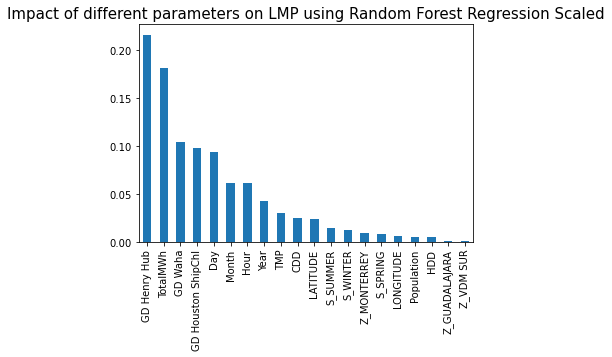

In [114]:
feature_importances_scaled.plot(kind='bar',rot=10,legend=False)
plt.title('Impact of different parameters on LMP using Random Forest Regression Scaled',fontsize=15)
plt.xticks(rotation = 90) 
plt.show()

 #### Correlation Matrix 

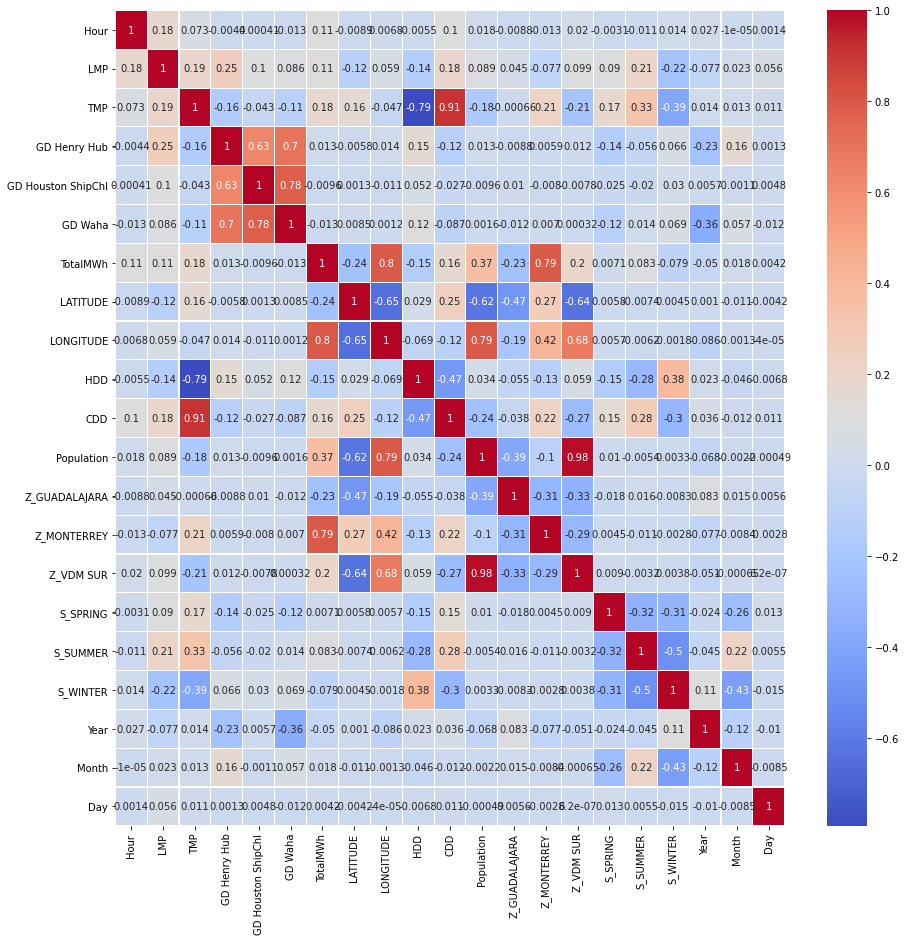

In [115]:
plt.figure(figsize=(15,15))
sns.heatmap(temp_price_nodate.corr(),linewidths=.1,cmap="coolwarm", annot=True)
plt.yticks(rotation=0);

The only collinear varibles I see from correlation matrix is population and city.

### Variance Inflation Factor with Standardized data

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


Z = add_constant(X_tr_scaled)
Col = list(X_train.columns)
Col = ["Constant"] + Col

VIF = pd.Series([variance_inflation_factor(Z, i) 
               for i in range(Z.shape[1])], 
              index=Col)
VIF

C:\Users\Zach Barrera\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Zach Barrera\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Constant               0.000000
Hour                   1.153979
TMP                         inf
GD Henry Hub           2.229453
GD Houston ShipChl     3.712692
GD Waha                4.655204
TotalMWh              13.386926
LATITUDE                    inf
LONGITUDE                   inf
HDD                         inf
CDD                         inf
Population                  inf
Z_GUADALAJARA               inf
Z_MONTERREY                 inf
Z_VDM SUR                   inf
S_SPRING               2.526079
S_SUMMER               2.537778
S_WINTER               3.469669
Year                   1.661936
Month                  1.887987
Day                    1.002534
dtype: float64

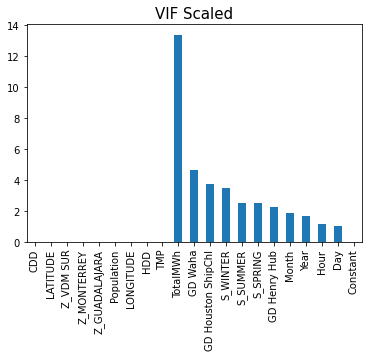

In [117]:
VIF.sort_values(ascending=False).plot(kind='bar',rot=10,legend=False)
plt.title('VIF Scaled',fontsize=15)
plt.xticks(rotation = 90) 
plt.show()

### Variance Inflation Factor with Non Standardized data

In [118]:
#X_train_vif = X_train.drop(['Year','Day','Month'], axis = 1)

D = add_constant(X_train)
Col = list(X_train.columns)
Col = ["Constant"] + Col

VIF_nonscaled = pd.Series([variance_inflation_factor(D.values, i) 
               for i in range(D.shape[1])], 
              index=Col)
VIF_nonscaled

Constant               0.000000
Hour                   1.153979
TMP                         inf
GD Henry Hub           2.229453
GD Houston ShipChl     3.712692
GD Waha                4.655204
TotalMWh              13.386926
LATITUDE                    inf
LONGITUDE                   inf
HDD                         inf
CDD                         inf
Population                  inf
Z_GUADALAJARA               inf
Z_MONTERREY                 inf
Z_VDM SUR                   inf
S_SPRING               2.526079
S_SUMMER               2.537778
S_WINTER               3.469669
Year                   1.661936
Month                  1.887987
Day                    1.002534
dtype: float64

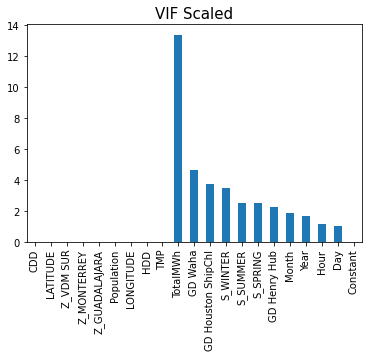

In [119]:
VIF_nonscaled.sort_values(ascending=False).plot(kind='bar',rot=10,legend=False)
plt.title('VIF Scaled',fontsize=15)
plt.xticks(rotation = 90) 
plt.show()

### VIF with removed columns 

In [120]:
from sklearn.preprocessing import MinMaxScaler
temp_price_nodate_vif = temp_price_nodate.drop(['LATITUDE', 'LONGITUDE','Population','HDD','Year'], axis = 1)

X_train_vif, X_test_vif, y_train_vif, y_test_vif = train_test_split(temp_price_nodate_vif.drop(columns='LMP'), 
                                                    temp_price_nodate_vif.LMP, test_size=0.3, 
                                                    random_state=42)

scaler_vif = RobustScaler()
scaler_vif.fit(X_train_vif)
X_tr_scaled_vif = scaler_vif.transform(X_train_vif)
X_te_scaled_vif = scaler_vif.transform(X_test_vif)

type(y_train_vif)
#scaler_vif_y = MinMaxScaler()
#scaler_vif_y.fit(y_train_vif.values.reshape(-1,1))
#Y_tr_scaled_vif = scaler_vif.transform(y_train_vif.values.reshape(-1,1))
#Y_te_scaled_vif = scaler_vif.transform(y_test_vif.values.reshape(-1,1))


pandas.core.series.Series

In [121]:
V = add_constant(X_tr_scaled_vif)
Col = list(X_train_vif.columns)
Col = ["Constant"] + Col

#len(Col)
#V.shape
#X_train_vif.shape
new_VIF = pd.Series([variance_inflation_factor(V, i) 
               for i in range(V.shape[1])], 
              index=Col)
new_VIF

Constant              24.637683
Hour                   1.152825
TMP                    6.825839
GD Henry Hub           2.213374
GD Houston ShipChl     2.741670
GD Waha                3.290402
TotalMWh              13.175430
CDD                    6.734774
Z_GUADALAJARA          2.694777
Z_MONTERREY           16.295865
Z_VDM SUR              6.808556
S_SPRING               2.510724
S_SUMMER               2.537556
S_WINTER               3.446530
Month                  1.886865
Day                    1.001543
dtype: float64

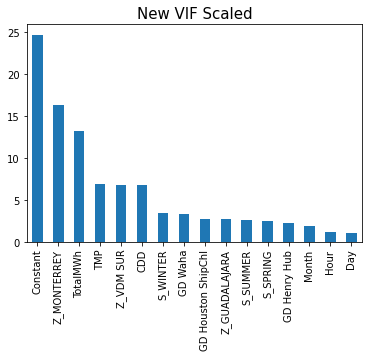

In [122]:
new_VIF.sort_values(ascending=False).plot(kind='bar',rot=10,legend=False)
plt.title('New VIF Scaled',fontsize=15)
plt.xticks(rotation = 90) 
plt.show()

In [125]:
import statsmodels.api as sm

X_tr_scaled_vif_old = sm.add_constant(X_tr_scaled_vif)
OLS = sm.OLS(y_train_vif, X_tr_scaled_vif_old).fit()
print(OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                    LMP   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     895.3
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        14:28:35   Log-Likelihood:            -2.4094e+05
No. Observations:               30592   AIC:                         4.819e+05
Df Residuals:                   30576   BIC:                         4.820e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1498.8884     18.084     82.884      0.0

In [126]:
OLS.params

const    1498.888367
x1        137.634349
x2        110.835794
x3        335.599713
x4         -9.331092
x5        -72.873355
x6        967.956275
x7         11.028013
x8       -264.251191
x9      -1643.072091
x10      -621.715333
x11       247.202472
x12       238.489204
x13      -106.073848
x14       -96.418089
x15        56.994835
dtype: float64

In [127]:
OLS.conf_int()

,0,1
const,1463.442656,1534.334078
x1,121.471674,153.797025
x2,84.932821,136.738767
x3,325.044860,346.154566
x4,-11.106947,-7.555236
x5,-84.053652,-61.693058
x6,926.653972,1009.258578
x7,-16.987203,39.043229
x8,-291.016920,-237.485461
x9,-1713.265941,-1572.878241


In [128]:
err_series = OLS.params - OLS.conf_int()[0]
err_series

const    35.445711
x1       16.162676
x2       25.902973
x3       10.554853
x4        1.775856
x5       11.180297
x6       41.302303
x7       28.015216
x8       26.765729
x9       70.193850
x10      43.568776
x11      30.245390
x12      23.993310
x13      28.335601
x14      14.447366
x15      12.242024
dtype: float64

In [129]:
coef_df = pd.DataFrame({'coef': OLS.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': list(X_train_vif.columns)
                       })
coef_df

,coef,err,varname
0,137.634349,16.162676,Hour
1,110.835794,25.902973,TMP
2,335.599713,10.554853,GD Henry Hub
3,-9.331092,1.775856,GD Houston ShipChl
4,-72.873355,11.180297,GD Waha
5,967.956275,41.302303,TotalMWh
6,11.028013,28.015216,CDD
7,-264.251191,26.765729,Z_GUADALAJARA
8,-1643.072091,70.193850,Z_MONTERREY
9,-621.715333,43.568776,Z_VDM SUR


<ipython-input-155-36e4e711b9e2>:8: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


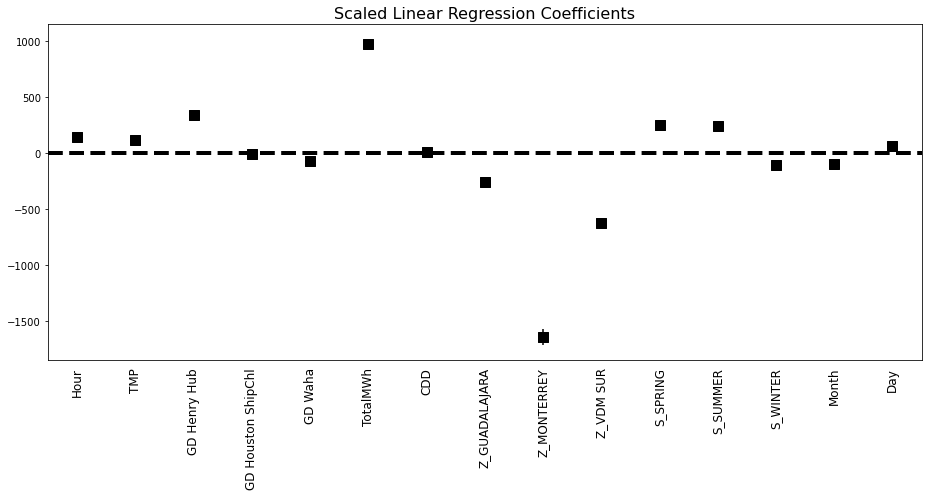

In [155]:
fig, ax = plt.subplots(figsize=(13, 7))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
plt.title('Scaled Linear Regression Coefficients',fontsize=16)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=100, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(list(X_train_vif.columns), 
                       rotation=90, fontsize=12)
plt.tight_layout()
plt.savefig('scaledregcof.png')

### Non scaled VIF with removed columns 

In [131]:
F = add_constant(X_train_vif)
Col = list(X_train_vif.columns)
#Col.append("Constant")
Col = ["Constant"] + Col

new_VIF_nonscaled = pd.Series([variance_inflation_factor(F.values, i) 
               for i in range(F.shape[1])], 
              index=Col)
new_VIF_nonscaled

Constant              230.501766
Hour                    1.152825
TMP                     6.825839
GD Henry Hub            2.213374
GD Houston ShipChl      2.741670
GD Waha                 3.290402
TotalMWh               13.175430
CDD                     6.734774
Z_GUADALAJARA           2.694777
Z_MONTERREY            16.295865
Z_VDM SUR               6.808556
S_SPRING                2.510724
S_SUMMER                2.537556
S_WINTER                3.446530
Month                   1.886865
Day                     1.001543
dtype: float64

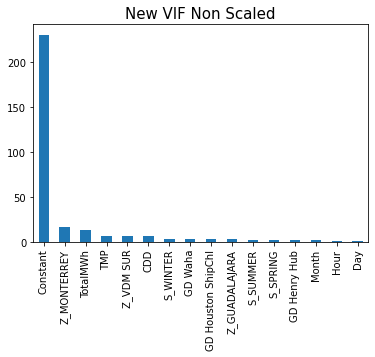

In [132]:
new_VIF_nonscaled.sort_values(ascending=False).plot(kind='bar',rot=10,legend=False)
plt.title('New VIF Non Scaled',fontsize=15)
plt.xticks(rotation = 90) 
plt.show()

In [133]:
X_train_vif_ols = sm.add_constant(X_train_vif)
OLS_nonscaled = sm.OLS(y_train_vif, X_train_vif_ols).fit()
print(OLS_nonscaled.summary())

                            OLS Regression Results                            
Dep. Variable:                    LMP   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     895.3
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        14:31:23   Log-Likelihood:            -2.4094e+05
No. Observations:               30592   AIC:                         4.819e+05
Df Residuals:                   30576   BIC:                         4.820e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1036.3457     55

In [134]:
OLS_nonscaled.params

const                -1036.345701
Hour                     9.175623
TMP                      6.481625
GD Henry Hub           497.184760
GD Houston ShipChl     -12.040118
GD Waha                -58.532815
TotalMWh                 0.646846
CDD                      0.854885
Z_GUADALAJARA         -264.251191
Z_MONTERREY          -1643.072091
Z_VDM SUR             -621.715333
S_SPRING               247.202472
S_SUMMER               238.489204
S_WINTER              -106.073848
Month                  -19.283618
Day                      3.799656
dtype: float64

In [135]:
OLS_nonscaled.conf_int()

,0,1
const,-1144.763576,-927.927825
Hour,8.098112,10.253135
TMP,4.966832,7.996419
GD Henry Hub,481.547941,512.821579
GD Houston ShipChl,-14.331545,-9.748692
GD Waha,-67.512973,-49.552657
TotalMWh,0.619246,0.674447
CDD,-1.316837,3.026607
Z_GUADALAJARA,-291.016920,-237.485461
Z_MONTERREY,-1713.265941,-1572.878241


In [136]:
err_series_nonscaled = OLS_nonscaled.params - OLS_nonscaled.conf_int()[0]
err_series_nonscaled

const                 108.417876
Hour                    1.077512
TMP                     1.514794
GD Henry Hub           15.636819
GD Houston ShipChl      2.291427
GD Waha                 8.980158
TotalMWh                0.027601
CDD                     2.171722
Z_GUADALAJARA          26.765729
Z_MONTERREY            70.193850
Z_VDM SUR              43.568776
S_SPRING               30.245390
S_SUMMER               23.993310
S_WINTER               28.335601
Month                   2.889473
Day                     0.816135
dtype: float64

<ipython-input-154-42b97a710257>:13: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df_nonscaled.shape[0]),


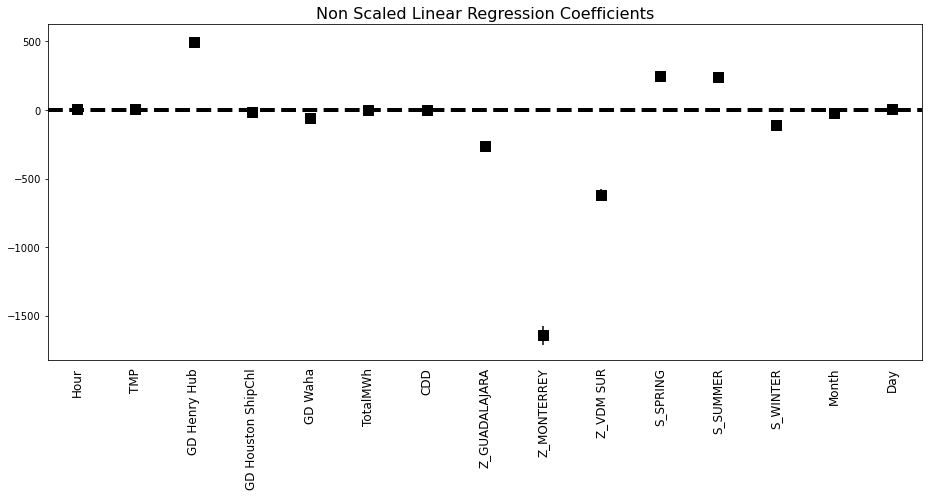

In [154]:
coef_df_nonscaled = pd.DataFrame({'coef': OLS_nonscaled.params.values[1:],
                        'err': err_series_nonscaled.values[1:],
                        'varname': err_series_nonscaled.index.values[1:]
                       })

fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Non Scaled Linear Regression Coefficients',fontsize=16)
coef_df_nonscaled.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df_nonscaled.shape[0]), 
           marker='s', s=100, 
           y=coef_df_nonscaled['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(err_series_nonscaled.index.values[1:], 
                       rotation=90, fontsize=12)
plt.tight_layout()
plt.savefig('nonscaledregcof.png')

In [50]:
# save the data to a new csv file
datapath = r"C:\Users\Zach Barrera\Documents\Zach\Springboard\Springboard\MexicoPowerPrices"
datapath_price_data = os.path.join(datapath, 'price_features_final_v2.csv')
if not os.path.exists(datapath_price_data):
    temp_price_data.to_csv(datapath_price_data, index=False)
